# Congressional voting dataset EDA

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('congressional_voting_dataset.csv')
df

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


'?' - missing values

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   handicapped_infants                     435 non-null    object
 1   water_project_cost_sharing              435 non-null    object
 2   adoption_of_the_budget_resolution       435 non-null    object
 3   physician_fee_freeze                    435 non-null    object
 4   el_salvador_aid                         435 non-null    object
 5   religious_groups_in_schools             435 non-null    object
 6   anti_satellite_test_ban                 435 non-null    object
 7   aid_to_nicaraguan_contras               435 non-null    object
 8   mx_missile                              435 non-null    object
 9   immigration                             435 non-null    object
 10  synfuels_corporation_cutback            435 non-null    object
 11  educat

In [71]:
d = {'y':1, 'n':0, '?':None}
for i in df.columns[:16]:
    df[i] = df[i].map(d)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped_infants                     423 non-null    float64
 1   water_project_cost_sharing              387 non-null    float64
 2   adoption_of_the_budget_resolution       424 non-null    float64
 3   physician_fee_freeze                    424 non-null    float64
 4   el_salvador_aid                         420 non-null    float64
 5   religious_groups_in_schools             424 non-null    float64
 6   anti_satellite_test_ban                 421 non-null    float64
 7   aid_to_nicaraguan_contras               420 non-null    float64
 8   mx_missile                              413 non-null    float64
 9   immigration                             428 non-null    float64
 10  synfuels_corporation_cutback            414 non-null    float6

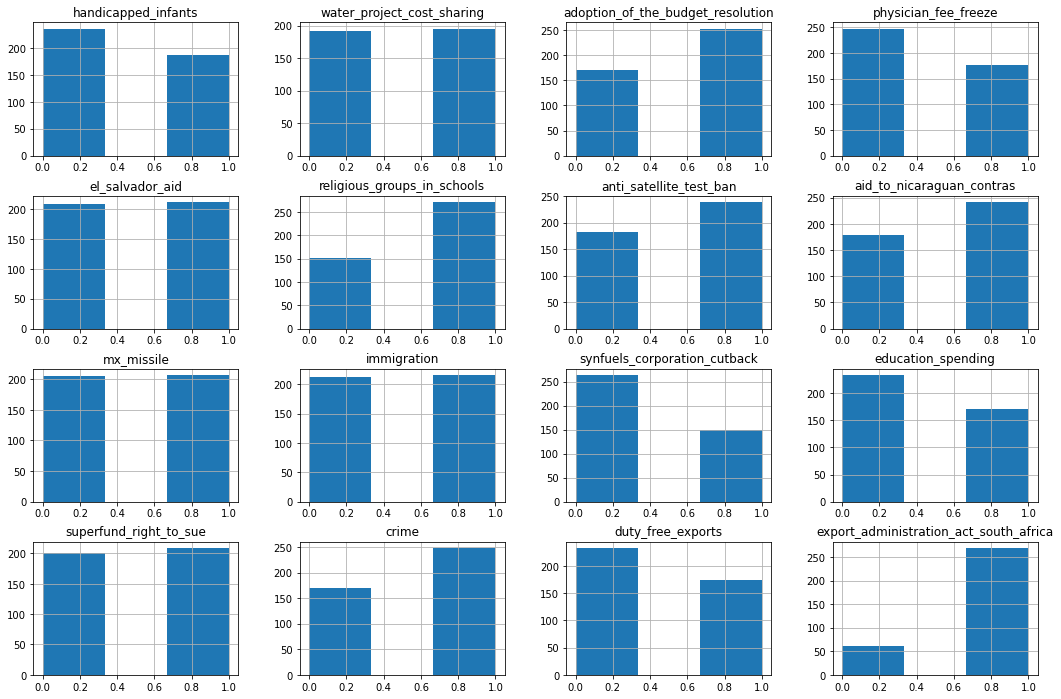

In [43]:
df.hist(bins = 3, figsize = (18,12))
plt.show()

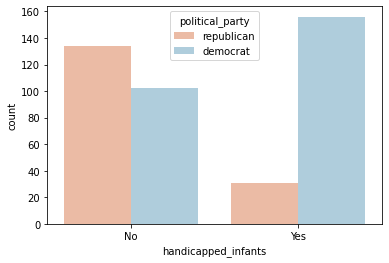

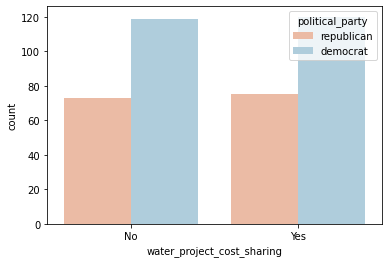

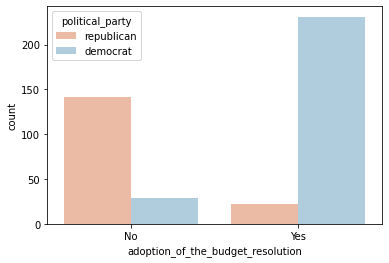

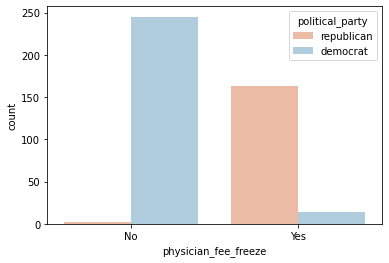

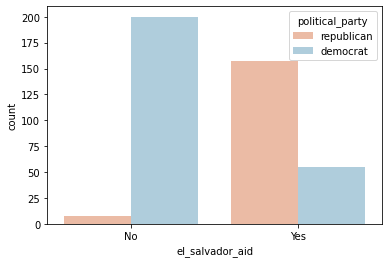

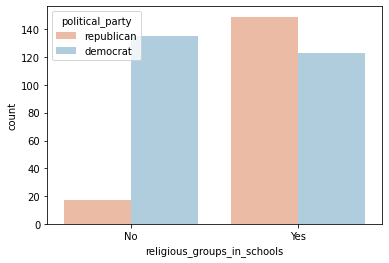

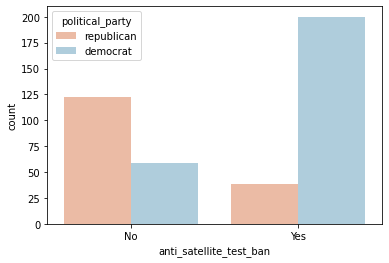

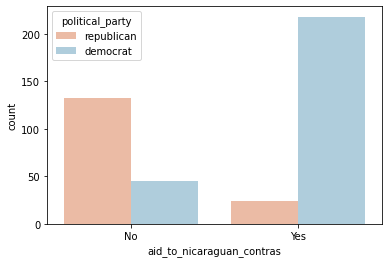

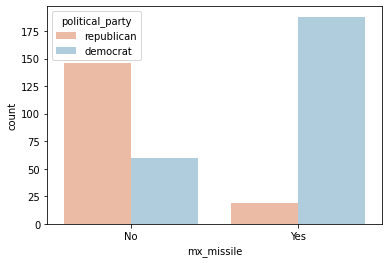

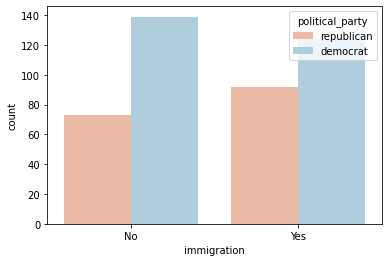

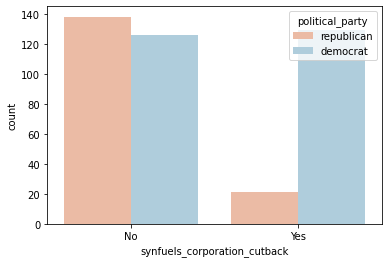

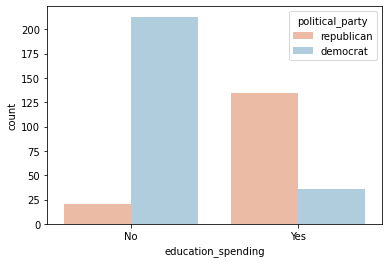

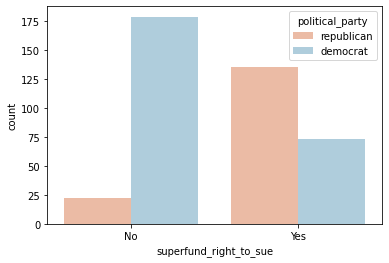

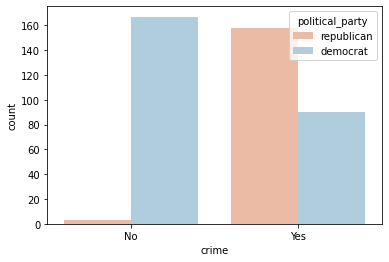

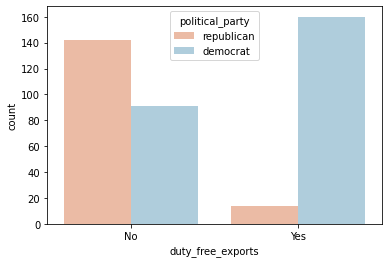

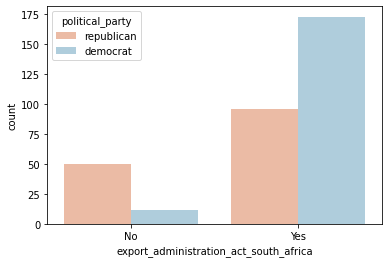

In [74]:
for i in df.columns[:16]:
    plt.figure()
    sns.countplot(x=i, hue='political_party', data=df, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()

In [72]:
df.loc[248]

handicapped_infants                              NaN
water_project_cost_sharing                       NaN
adoption_of_the_budget_resolution                NaN
physician_fee_freeze                             NaN
el_salvador_aid                                  NaN
religious_groups_in_schools                      NaN
anti_satellite_test_ban                          NaN
aid_to_nicaraguan_contras                        NaN
mx_missile                                       NaN
immigration                                      NaN
synfuels_corporation_cutback                     NaN
education_spending                               NaN
superfund_right_to_sue                           NaN
crime                                            NaN
duty_free_exports                                NaN
export_administration_act_south_africa           NaN
political_party                           republican
Name: 248, dtype: object

In [37]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_widgets()

## Wnioski
* duża liczba braków danych (szczególnie kolumna `export_administration_act_south_africa` - 23.9%)
* wysoka korelacja pomiędzy `physician_fee_freeze` i `political_party`
* zduplikowane wiersze mogą być różnymi osobami głosującymi tak samo
* 